# Отток клиентов

# Описание проекта

В рамках проекта я исследовал отток клиентов из банка. Для исследования был предоставлен датафрейм, в котором представлены различные данные о клиентах. Данные принимают целочисленные значения, например скоринг и возраст. Также некоторые данные принимаю дробные значения, например, заработная плата, баланс счета. И встречаются категориальные переменные, например, целевой признак -- exited и numofproducts. 
    
Таким образом из информации, предоставленной марктетологами, нам предстоит исследовать ситуацию, которая сложилась в банке, путем создания и обучения моделей машинного обучения. Для решения поставленной задачи будут использованы различные библиотеки, а также сами модели МО для того, чтобы максимизировать точность полученного результата. 

## Подготовка данных

In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import make_classification
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
!pip install phik
from sklearn.utils import shuffle
import phik
from phik.report import plot_correlation_matrix
from phik import report
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

     |████████████████████████████████| 679 kB 1.2 MB/s eta 0:00:01


In [2]:
df = pd.read_csv('/datasets/Churn.csv')
display(df.head(10))
df.shape

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2.0,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1.0,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8.0,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1.0,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2.0,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8.0,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7.0,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4.0,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4.0,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2.0,134603.88,1,1,1,71725.73,0


(10000, 14)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           9091 non-null   float64
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(3), int64(8), object(3)
memory usage: 1.1+ MB


In [4]:
df.columns = df.columns.str.lower() #преобразуем названия столбцов по змеиному регистру

In [5]:
df.isna().sum() # исследуем датафрей на пропуски

rownumber            0
customerid           0
surname              0
creditscore          0
geography            0
gender               0
age                  0
tenure             909
balance              0
numofproducts        0
hascrcard            0
isactivemember       0
estimatedsalary      0
exited               0
dtype: int64

In [6]:
df = df.dropna(subset=['tenure']) # поскольку пропущенных значений менее 10%, их можно удалить
df['tenure'].isna().sum() # проверяем корректное удаление пропущенных значений
df['tenure'].value_counts() 

1.0     952
2.0     950
8.0     933
3.0     928
5.0     927
7.0     925
4.0     885
9.0     882
6.0     881
10.0    446
0.0     382
Name: tenure, dtype: int64

Поскольку в столбце tenure только целочисленные значения, их можно преобразовать в int.

In [7]:
df['tenure'] = df['tenure'].astype('Int64', errors='ignore')
df['tenure'].dtype

Int64Dtype()

## Исследование задачи

Создадим features и target относительно поставленной задачи. 
    

In [8]:
encoder = OrdinalEncoder()
df_ord = pd.DataFrame(encoder.fit_transform(df),
                            columns=df.columns)

features = df_ord.drop(['exited'], axis=1)
target = df_ord['exited']

features_train, features_valid, target_train, target_valid = train_test_split(
    features , target, test_size=0.4, random_state=12345)

features_test, features_valid, target_test, target_valid = train_test_split(
    features_valid, target_valid, test_size=0.5, random_state=12345)

numeric = ['creditscore', 'age', 'tenure', 'balance', 'estimatedsalary']

scaler = StandardScaler()
scaler.fit(features_train[numeric])
features_train[numeric] = scaler.transform(features_train[numeric])
features_valid[numeric] = scaler.transform(features_valid[numeric])
features_test[numeric] = scaler.transform(features_test[numeric])

/tmp/ipykernel_48/2569057527.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features_train[numeric] = scaler.transform(features_train[numeric])
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
/opt/conda/lib/python3.9/site-packages/pandas/core/indexing.py:692: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/i

In [9]:
features_train = features_train.drop(columns=['surname', 'customerid', 'rownumber']) 
features_valid = features_valid.drop(columns=['surname', 'customerid', 'rownumber'])
features_test = features_test.drop(columns=['surname', 'customerid', 'rownumber'])
# для обучения модели удалим некоторые столбцы
#display(features_train)

In [10]:
df.columns

Index(['rownumber', 'customerid', 'surname', 'creditscore', 'geography',
       'gender', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard',
       'isactivemember', 'estimatedsalary', 'exited'],
      dtype='object')

interval columns not set, guessing: ['rownumber', 'customerid', 'creditscore', 'age', 'tenure', 'balance', 'numofproducts', 'hascrcard', 'isactivemember', 'estimatedsalary', 'exited']


<AxesSubplot:>

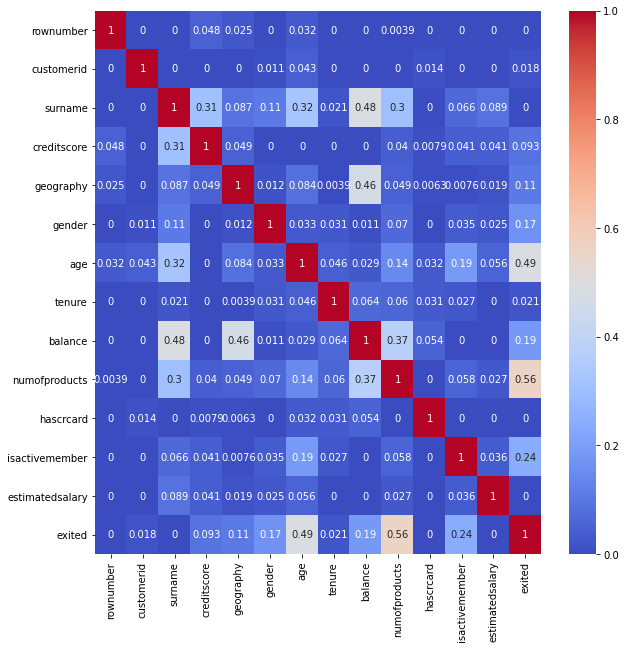

In [11]:
warnings.filterwarnings('ignore')

phik_overview = df.phik_matrix()

fig, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(phik_overview, cmap='coolwarm', annot=True, ax=ax)


После вывода матрицы корреляций можно заметить, что сильной связи между признакми не наблюдается, что исключает вероятность мультиколлинеарности. 

После создания признаков и цели, рассмотрим несколько вариантов моделей для бинарной классификации. Подберем гиперпараметры используя цикл. 

LogisticRegression(max_iter=1901, random_state=12345, solver='saga')
Accuracy лучшей модели: 0.8196811434854315
F1 мера модели: 0.2579185520361991
AUC ROC метрика равна 0.7653260051080214


<Figure size 432x288 with 0 Axes>

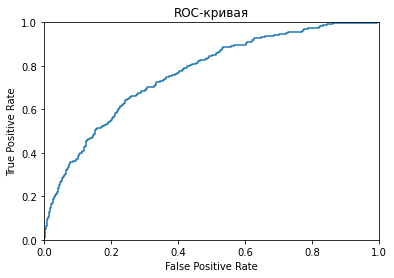

In [12]:
warnings.filterwarnings('ignore')

best_model = None
best_accuracy = 0

for itera in range(1, 2000, 100): 
    for solver in ['lbfgs', 'liblinear', 'sag', 'saga']: 
        model = LogisticRegression(random_state=12345, max_iter=itera, solver=solver)
        model.fit(features_train, target_train) 
        predictions = model.predict(features_valid).round()
        accuracy = accuracy_score(target_valid, predictions) 
        if accuracy > best_accuracy: 
            best_model = model
            beat_accuracy = accuracy
            
#print(best_accuracy) 
print(best_model)

model = LogisticRegression(random_state=12345, solver='saga', max_iter = 1901) 
model.fit(features_train, target_train) 
predictions = model.predict(features_valid)
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Таким образом можно заметить, что при оптимальных гиперпараметрах точность модели будет составлять 0.8. F1 мера равна 0.08, а метрика AUC ROC равна 0.62. Также построив ROC-кривую можно сказать, что она не сильно отличается от такого же графика для случайной модели, что говорит о том, что применение модели логистической регресси не имеет смысла. Однако при дальнейшем изменении гиперпараметра class_weight, можно сделать вывод о том, что результаты поменялись: F1 мера выросла на 0.34, а AUC ROC метрика выросла на 0.07.

Accuracy лучшей модели: 0.8196811434854315
F1 мера модели: 0.2579185520361991
AUC ROC метрика равна 0.7653260051080214


<Figure size 432x288 with 0 Axes>

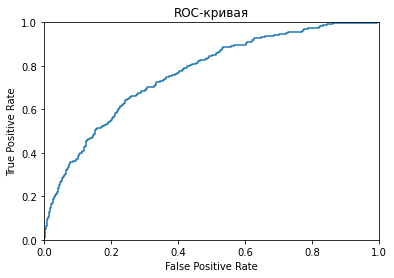

In [13]:
model = LogisticRegression(random_state=12345, solver='saga', max_iter = 1901) 
model.fit(features_train, target_train) 
prediction = model.predict(features_valid)
accuracy = accuracy_score(target_valid, prediction)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

После вывода можно заметить, что график ROC-кривой также не сильно отличается от предыдущего, а значение F1 меры равно 0. Но метрика accuracy все равно высокая, что позволит вернуться к этой модели при решении проблемы дисбаланса классов.

Лучшая модель: DecisionTreeClassifier(max_depth=6, min_samples_leaf=6, random_state=12345)
Accuracy лучшей модели: 0.8581638262781748
F1 мера модели: 0.5038461538461538
AUC ROC метрика равна 0.8306007747424642


<Figure size 432x288 with 0 Axes>

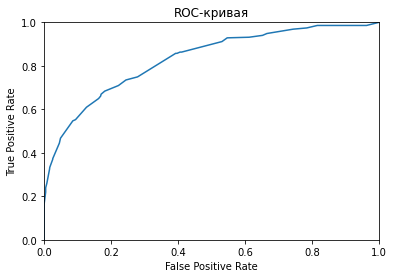

In [14]:
best_model = None 
best_accuracy = 0 

for depth in range(1,51): 
    for leaf in range(1,12): 
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf)
        model.fit(features_train, target_train)
        predictions = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, predictions)
        if accuracy > best_accuracy: 
            best_model = model
            best_accuracy = accuracy
            
print('Лучшая модель:', best_model)
#print('Наивысшая точность', best_accuracy)

model = DecisionTreeClassifier(max_depth=6, min_samples_leaf=9, random_state=12345)
model.fit(features_train, target_train) 
predictions = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Accuracy лучшей модели: 0.8669598680593733
F1 мера модели: 0.5433962264150943
AUC ROC метрика равна 0.8544834920856719


<Figure size 432x288 with 0 Axes>

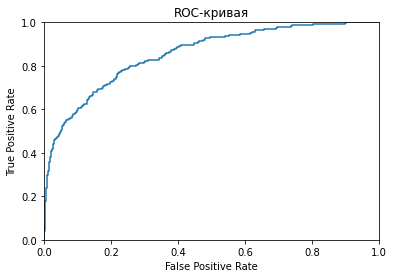

In [15]:
best_model = None 
best_accuracy = 0 

for depth in range(1, 21, 10): 
    for leaf in range(1,12): 
        for crit in ['gini', 'entropy']:
            model = RandomForestClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf, criterion=crit)
            model.fit(features_train, target_train)
            predictions = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predictions)
            if accuracy > best_accuracy: 
                best_model = model
                best_accuracy = accuracy

#print('Лучшая модель:', best_model)

model = RandomForestClassifier(max_depth=11, random_state=12345) 
model.fit(features_train, target_train) 
predictions = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Пока самая лучшая модель, которая получилась при проблеме дисбаланса -- модель DecisionTreeClassifier. ROC-кривая почти не повторяет кривую случайной модели, а значение F1 меры равно 0.58. AUC ROC метрика равна 0.73.

## Борьба с дисбалансом

In [16]:
df['exited'].value_counts(normalize=True) 

0    0.796062
1    0.203938
Name: exited, dtype: float64

При выводе видно, что данные разбиты в соотношении 80% / 20%, где большая часть клиентов еще не ушла из банка, а 20% клиентов -- ушли. Таким образом имеет смысл бороться с проблемой дисбаланса классов для того, чтобы максимизировать полезность исследования.  

Для того, чтобы приравнять классы воспользуемся функцией upsampling

In [17]:
def upsample(features, target, repeat):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_upsampled = pd.concat([features_zeros] + [features_ones] * repeat)
    target_upsampled = pd.concat([target_zeros] + [target_ones] * repeat)
    
    features_upsampled, target_upsampled = shuffle(
        features_upsampled, target_upsampled, random_state=12345)
    
    return features_upsampled, target_upsampled

features_upsampled, target_upsampled = upsample(features_train, target_train, 4)

best_model = None 
best_accuracy = 0 

for depth in range(1,51): 
    for leaf in range(1,12): 
        model = DecisionTreeClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf)
        model.fit(features_upsampled, target_upsampled)
        predictions = model.predict(features_valid)
        accuracy = accuracy_score(target_valid, predictions)
        if accuracy > best_accuracy: 
            best_model = model
            best_accuracy = accuracy
            
#print('Лучшая модель:', best_model)

model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=12345)
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

Accuracy лучшей модели: 0.7894447498625619
F1 мера модели: 0.5478158205430932
AUC ROC метрика равна 0.8266028552132094


Метрика модели не изменилась, поэтому попробуем иной метод борьбы с дисбалансом классов, а именно добавить новый гиперпараметр: class_weight = True. Для этого также возьмем модель, которая показала себя лучше всего. 

In [18]:
model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=12345)
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

Accuracy лучшей модели: 0.7894447498625619
F1 мера модели: 0.5478158205430932
AUC ROC метрика равна 0.8266028552132094


Таким образом можно заметить, что F1 мера выросла на 0.2, но все равно не проходит порог. Поэтому попробуем метод downsampling с гиперпараметром class_weight=True:

In [19]:
def downsample(features, target, fraction):
    features_zeros = features[target == 0]
    features_ones = features[target == 1]
    target_zeros = target[target == 0]
    target_ones = target[target == 1]

    features_downsampled = pd.concat(
        [features_zeros.sample(frac=fraction, random_state=12345)] + [features_ones])
    target_downsampled = pd.concat(
        [target_zeros.sample(frac=fraction, random_state=12345)] + [target_ones])
    
    features_downsampled, target_downsampled = shuffle(
        features_downsampled, target_downsampled, random_state=12345)
    
    return features_downsampled, target_downsampled

features_downsampled, target_downsampled = downsample(features_train, target_train, 0.25)

model = DecisionTreeClassifier(max_depth=5, min_samples_leaf=15, random_state=12345)
model.fit(features_downsampled, target_downsampled) 
predictions = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

Accuracy лучшей модели: 0.7663551401869159
F1 мера модели: 0.5385450597176982
AUC ROC метрика равна 0.8281932897055513


При этом показатели модели также не изменились. Попробуем метод на другой модели: 

In [20]:
best_model = None 
best_accuracy = 0 

for depth in range(1, 21, 10): 
    for leaf in range(1,12): 
        for crit in ['gini', 'entropy']:
            model = RandomForestClassifier(random_state=12345, max_depth=depth, min_samples_leaf=leaf, criterion=crit)
            model.fit(features_downsampled, target_downsampled)
            predictions = model.predict(features_valid)
            accuracy = accuracy_score(target_valid, predictions)
            if accuracy > best_accuracy: 
                best_model = model
                best_accuracy = accuracy

#print('Лучшая модель:', best_model)

model = RandomForestClassifier(max_depth=11, min_samples_leaf=3, random_state=12345, criterion='entropy')
model.fit(features_downsampled, target_downsampled) 
predictions = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

Accuracy лучшей модели: 0.7548103353490929
F1 мера модели: 0.554
AUC ROC метрика равна 0.8570045102742652


In [21]:
best_model = None 
best_accuracy = 0 

for depth in range(1, 21, 10): 
    for leaf in range(1,12): 
        for crit in ['gini', 'entropy']:
            for ens in range(100, 200, 10):
                model = RandomForestClassifier(random_state=12345, n_estimators=ens, max_depth=depth, min_samples_leaf=leaf, criterion=crit)
                model.fit(features_upsampled, target_upsampled)
                predictions = model.predict(features_valid)
                accuracy = accuracy_score(target_valid, predictions)
                if accuracy > best_accuracy: 
                    best_model = model
                    best_accuracy = accuracy


predictions = best_model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = best_model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

Accuracy лучшей модели: 0.8262781748213304
F1 мера модели: 0.5853018372703412
AUC ROC метрика равна 0.8522108883144306


In [22]:
model = RandomForestClassifier(max_depth=11, min_samples_leaf=3, random_state=12345, criterion='entropy')
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

Accuracy лучшей модели: 0.8152831225948324
F1 мера модели: 0.5872235872235873
AUC ROC метрика равна 0.8586541372644916


In [23]:
model = RandomForestClassifier(max_depth=11, min_samples_leaf=3, random_state=12345, criterion='entropy')
model.fit(features_downsampled, target_downsampled) 
predictions = model.predict(features_valid) 
accuracy = accuracy_score(target_valid, predictions)
f1 = f1_score(target_valid, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

Accuracy лучшей модели: 0.7548103353490929
F1 мера модели: 0.554
AUC ROC метрика равна 0.8570045102742652


После нескольких тестов можно сказать, что лучше всего себя показала модель RandomForestClassifier, у которой показатель F1 составил 0.59, а метрика AUC ROC составила 0.76. Таким образом на тестовой выборке мы будем тестировать именно такую модель. 

## Тестирование модели

Accuracy лучшей модели: 0.8217821782178217
F1 мера модели: 0.6206088992974239
AUC ROC метрика равна 0.8586541372644916


<Figure size 432x288 with 0 Axes>

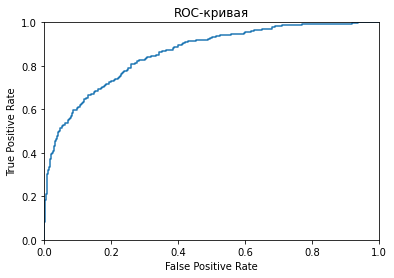

In [24]:
model = RandomForestClassifier(max_depth=11, random_state=12345,min_samples_leaf = 3, criterion='entropy') 
model.fit(features_upsampled, target_upsampled) 
predictions = model.predict(features_test) 
accuracy = accuracy_score(target_test, predictions)
f1 = f1_score(target_test, predictions)
probabilities_valid = model.predict_proba(features_valid)
probabilities_one_valid = probabilities_valid[:, 1]
auc_roc = roc_auc_score(target_valid, probabilities_one_valid)
print('Accuracy лучшей модели:', accuracy)
print('F1 мера модели:', f1)
print('AUC ROC метрика равна', auc_roc)

fpr, tpr, thresholds = roc_curve(target_valid, probabilities_one_valid)

plt.figure()
plt.figure()
plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-кривая')
plt.show() 

Таким образом можно сказать, что на тестовой выборке показатели модели с оптимальными гиперпараметрами составили: 0.83 для accuracy, 0.62 для F1 и 0.77 для AUC ROC. 

# Вывод 

В проекте были сделаны следующие пункты: 
    
    
1) Проанализированы и удалены пропуски
    
    
2) Проанализирована проблема мультиколлинеарности
    
    
3) Был исследован баланс классов, а также впоследствии устранен несколькими способами
    
    
4) Были обучены модели с оптимальными гиперпараметрами без учета дисбаланса классов, а впоследствии и с учетом дисбаланса классов
    
    
5) Также была выбрана лучшая модель, опираясь на три метрики (F1, AUC ROC, Accuracy) и протестирована на тестовой выборке 
    
    
6) Удалось достичь значения метрики F1 > 0.59